In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dfPassing = pd.read_csv('./NFL_Data/2019/2019_NFL_Passing.csv', sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')

In [3]:
player_columns = ['Player', 'Tm', 'Age', 'Pos', 'G', 'GS']
del dfPassing['GWD']
del dfPassing['4QC']
del dfPassing['Yds.1']
passing_columns = ['QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'NY/A', 'ANY/A', 'Sk%']

In [4]:
pointsPerRec = 1
pointsPerPassingTD = 4
pointsPerRushingTD = 4
pointsPerReceivingTD = 4
pointsPerRushingYD = 0.1
pointsPerReceivingYd = 0.1
pointsPerPassingYd = 0.04
pointsPerFumble = -2
pointsPerINT = -2

In [5]:
dfPassing['PassingFPs'] = dfPassing['Yds'] * pointsPerPassingYd + dfPassing['TD'] * pointsPerPassingTD + dfPassing['Int'] * pointsPerINT

In [6]:
qb_passing_df = dfPassing[dfPassing['Pos'] == 'QB']
rb_passing_df = dfPassing[dfPassing['Pos'] == 'RB']
k_passing_df = dfPassing[dfPassing['Pos'] == 'K']
wr_passing_df = dfPassing[dfPassing['Pos'] == 'WR']

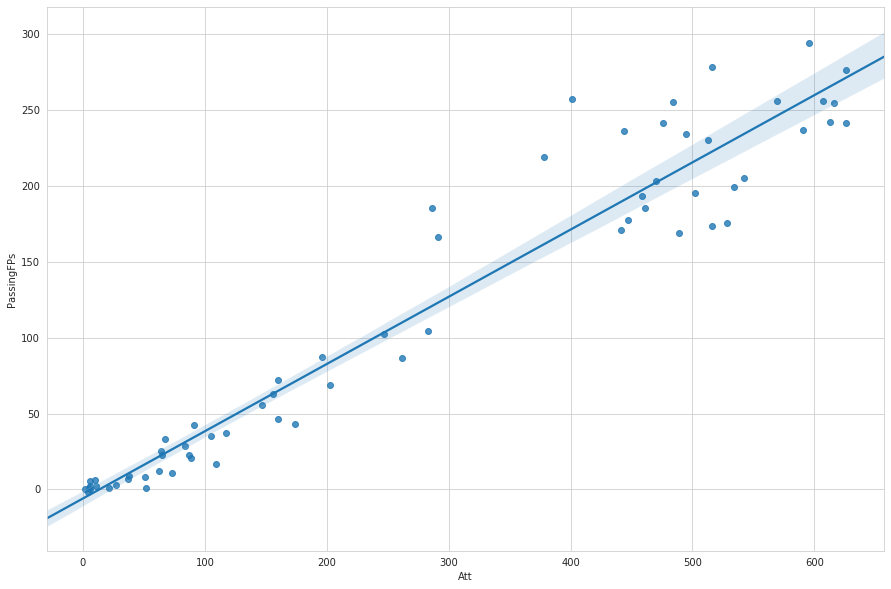

In [7]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

plot = sns.regplot(
        x = qb_passing_df['Att'],
        y = qb_passing_df['PassingFPs'],
        scatter=True,)

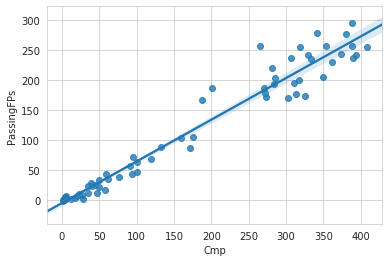

In [8]:
plot = sns.regplot(
        x = qb_passing_df['Cmp'],
        y = qb_passing_df['PassingFPs'],
        scatter=True,)

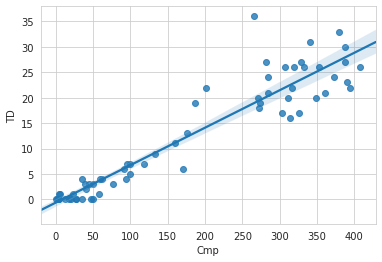

In [9]:
plot = sns.regplot(
        x = qb_passing_df['Cmp'],
        y = qb_passing_df['TD'],
        scatter=True,)

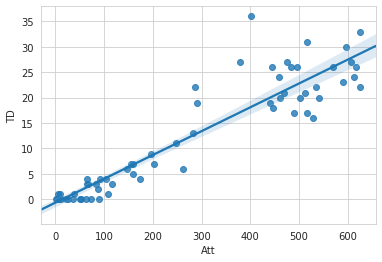

In [10]:
plot = sns.regplot(
        x = qb_passing_df['Att'],
        y = qb_passing_df['TD'],
        scatter=True,)

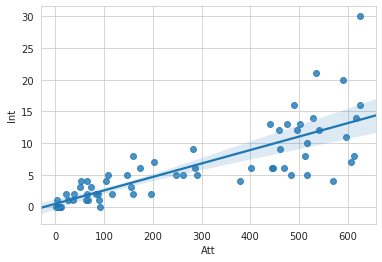

In [11]:
plot = sns.regplot(
        x = qb_passing_df['Att'],
        y = qb_passing_df['Int'],
        scatter=True,)

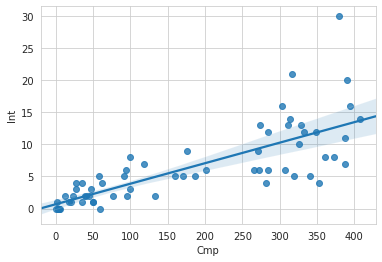

In [12]:
plot = sns.regplot(
        x = qb_passing_df['Cmp'],
        y = qb_passing_df['Int'],
        scatter=True,)

In [13]:
import statsmodels.api as sm

In [14]:
X = qb_passing_df[passing_columns]
XAtt = qb_passing_df["Att"]
XCmp = qb_passing_df["Cmp"]
XYds = qb_passing_df["Yds"]
XTD = qb_passing_df["TD"]
XInt = qb_passing_df["Int"]
XQBR = qb_passing_df["QBR"]
XRate = qb_passing_df["Rate"]

del X["QBrec"]
X = X.apply(pd.to_numeric)
XAtt = XAtt.apply(pd.to_numeric)
XCmp = XCmp.apply(pd.to_numeric)
XYds = XYds.apply(pd.to_numeric)
XTD = XTD.apply(pd.to_numeric)
XInt = XInt.apply(pd.to_numeric)
XQBR = XQBR.apply(pd.to_numeric)
XRate = XRate.apply(pd.to_numeric)

In [15]:
Y = qb_passing_df["PassingFPs"]

In [16]:
modelA = sm.OLS(Y, X).fit()

predictions = modelA.predict(X)

modelA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.508e+29
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:51:43   Log-Likelihood:                          1773.6
No. Observations:                  65   AIC:                                     -3507.
Df Residuals:                      45   BIC:                                     -3464.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cmp        -6.661e-16   8.31e-15     -0.080      0.936   -1.74e-14    1.61e-14
Att        -2.887e-15   4.31e-15     -0.670      0.506   -1.16e-14    5.79e-15
Cmp%       -3.331e-15   2.01e-14     -0.166      0.869   -4.38e-14    3.71e-14
Yds            0.0400   4.33e-16   9.24e+13      0.000       0.040       0.040
TD             4.0000   2.56e-14   1.56e+14      0.000       4.000       4.000
TD%        -3.553e-14    3.3e-13     -0.108      0.915      -7e-13    6.28e-13
Int           -2.0000   2.15e-14  -9.29e+13      0.000      -2.000      -2.000
Int%        7.816e-14   7.17e-13      0.109      0.914   -1.37e-12    1.52e-12
1D          6.217e-15   9.23e-15      0.674      0.504   -1.24e-14    2.48e-14
Lng         1.887e-15   4.59e-15      0.411      0.683   -7.35e-15    1.11e-14
Y/A        -2.558e-13   1.44e-12     -0.178      0.860   -3.15e-12    2.64e-12
AY/A        2.274e-13   1.43e-12      0.159      0.874   -2.65e-12     3.1e-12
Y/C         9.992e-16    7.8e-14      0.013      0.990   -1.56e-13    1.58e-13
Y/G         2.186e-15   1.31e-15      1.670      0.102   -4.51e-16    4.82e-15
Rate       -3.553e-15   1.86e-14     -0.191      0.850   -4.11e-14     3.4e-14
QBR         -2.22e-16   5.22e-15     -0.043      0.966   -1.07e-14    1.03e-14
Sk         -4.441e-16   1.04e-14     -0.043      0.966   -2.14e-14    2.05e-14
NY/A        2.132e-14   8.27e-13      0.026      0.980   -1.64e-12    1.69e-12
ANY/A       3.553e-14   7.47e-13      0.048      0.962   -1.47e-12    1.54e-12
Sk%         6.217e-15   5.44e-14      0.114      0.910   -1.03e-13    1.16e-13
==============================================================================
Omnibus:                        9.047   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.476
Skew:                           0.662   Prob(JB):                      0.00876
Kurtosis:                       4.321   Cond. No.                     1.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
modelAtt = sm.OLS(Y, XAtt).fit()

predictions = modelAtt.predict(XAtt)

modelAtt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              2128.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    7.86e-51
Time:                        13:51:43   Log-Likelihood:                         -304.37
No. Observations:                  65   AIC:                                      610.7
Df Residuals:                      64   BIC:                                      612.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Att            0.4295      0.009     46.128      0.000       0.411       0.448
==============================================================================
Omnibus:                       17.869   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.041
Skew:                           1.189   Prob(JB):                     1.64e-05
Kurtosis:                       4.575   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
modelCmp = sm.OLS(Y, XCmp).fit()

predictions = modelCmp.predict(XCmp)

modelCmp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              3087.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    7.06e-56
Time:                        13:51:44   Log-Likelihood:                         -292.58
No. Observations:                  65   AIC:                                      587.2
Df Residuals:                      64   BIC:                                      589.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cmp            0.6755      0.012     55.561      0.000       0.651       0.700
==============================================================================
Omnibus:                       19.452   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.321
Skew:                           1.164   Prob(JB):                     1.17e-06
Kurtosis:                       5.160   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
modelYds = sm.OLS(Y, XYds).fit()

predictions = modelYds.predict(XYds)

modelYds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              4853.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    4.62e-62
Time:                        13:51:44   Log-Likelihood:                         -278.12
No. Observations:                  65   AIC:                                      558.2
Df Residuals:                      64   BIC:                                      560.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yds            0.0590      0.001     69.660      0.000       0.057       0.061
==============================================================================
Omnibus:                       26.916   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.553
Skew:                           1.285   Prob(JB):                     4.30e-14
Kurtosis:                       7.015   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
modelTD = sm.OLS(Y, XTD).fit()

predictions = modelTD.predict(XTD)

modelTD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              5277.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    3.26e-63
Time:                        13:51:44   Log-Likelihood:                         -275.42
No. Observations:                  65   AIC:                                      552.8
Df Residuals:                      64   BIC:                                      555.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TD             9.2348      0.127     72.645      0.000       8.981       9.489
==============================================================================
Omnibus:                       36.144   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.727
Skew:                          -1.509   Prob(JB):                     1.24e-30
Kurtosis:                       9.461   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
modelInt = sm.OLS(Y, XInt).fit()

predictions = modelInt.predict(XInt)

modelInt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              187.1
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    1.14e-20
Time:                        13:51:44   Log-Likelihood:                         -374.78
No. Observations:                  65   AIC:                                      751.6
Df Residuals:                      64   BIC:                                      753.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int           15.3818      1.124     13.680      0.000      13.136      17.628
==============================================================================
Omnibus:                        3.890   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.987
Skew:                           0.471   Prob(JB):                        0.225
Kurtosis:                       3.463   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
modelQBR = sm.OLS(Y, XQBR).fit()

predictions = modelQBR.predict(XQBR)

modelQBR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              180.6
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    2.69e-20
Time:                        13:51:44   Log-Likelihood:                         -375.64
No. Observations:                  65   AIC:                                      753.3
Df Residuals:                      64   BIC:                                      755.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QBR            2.6904      0.200     13.438      0.000       2.290       3.090
==============================================================================
Omnibus:                        6.303   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.631
Skew:                          -0.703   Prob(JB):                       0.0599
Kurtosis:                       3.316   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
modelRate = sm.OLS(Y, XRate).fit()

predictions = modelRate.predict(XRate)

modelRate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PassingFPs   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                              137.9
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    1.30e-17
Time:                        13:51:44   Log-Likelihood:                         -381.88
No. Observations:                  65   AIC:                                      765.8
Df Residuals:                      64   BIC:                                      767.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rate           1.4899      0.127     11.742      0.000       1.236       1.743
==============================================================================
Omnibus:                       28.982   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.006
Skew:                           0.175   Prob(JB):                       0.0818
Kurtosis:                       1.686   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""